<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/1_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 유투브 랭킹 사이트
- 유투브 랭킹 데이터 수집 후 분석
- 랭킹 데이터 시각화


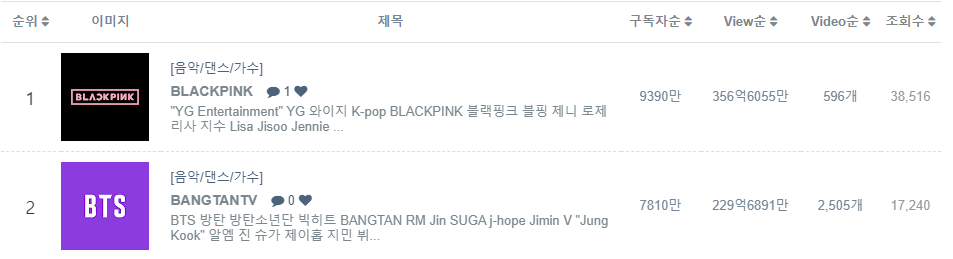

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1. 패키지 로드

In [ ]:
!pip install selenium
!pip install webdriver-manager
!pip install koreanize_matplotlib

!pip install BeautifulSoup
!pip install lxml

!apt install chromium-chromedriver
# 크롬드라이버 별도 설치
!cp /usr/lib/chromium-browser/chromedriver '/content/gdrive/MyDrive/Colab Notebooks/driver'
!pip install chromedriver-autoinstaller

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from selenium import webdriver
from selenium.webdriver import ChromeOptions
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

from bs4 import BeautifulSoup

import time

import sys

import chromedriver_autoinstaller

In [ ]:
# 그래프에 retina display 적용 (옵션)
# %config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

# 버전 변경에 따른 알림 메세지 무시하기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2. 드라이버 로드

In [ ]:
chrome_path = "/content/gdrive/MyDrive/Colab Notebooks/driver/chromedriver"
sys.path.insert(0,chrome_path)

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration

### 3. 원하는 사이트 크롤링

In [ ]:
# url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
# 크롬 구동

browser = webdriver.Chrome(options=chrome_options)
time.sleep(3)

# browser.get(url)

### 4. 스크롤 내리기

In [ ]:
prev_height = browser.execute_script("return document.body.scrollHeight")

while True:
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(3)
    cur_height = browser.execute_script("return document.body.scrollHeight")

    if cur_height == prev_height:
      break
      prev_height = cur_height

time.sleep(2)

### 5. 데이터 추출

In [ ]:
# soup
soup = BeautifulSoup(browser.page_source, "lxml")
total_info = soup.find_all("tr", "aos-init")

print(total_info[:10])

[<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/EMHEc8vNqHUC-eBFl_RrLcla7_NH6hEohpi0RrMABe6cOcmCabmnxcqfVFmONWTQg5LtbpNkQg=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="/img/img_bg.png" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
</h1><p class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="fa fa-comment"></i>
								1							</span>
<i aria-hidden="tr

In [ ]:
# 다섯 개만 카테고리 가져오기
for info in total_info[:5]:
  category = info.select_one(".subject p").text.strip()
  print(category)

[음악/댄스/가수]
[음악/댄스/가수]
[음악/댄스/가수]
[미분류]
[미분류]


In [ ]:
# 카테고리, 제목 추출

for info in total_info[:5]:
  category = info.select_one(".subject p").text.strip()
  title = info.select_one(".subject a").text.strip()
  print(category, title)

[음악/댄스/가수] BLACKPINK
[음악/댄스/가수] BANGTANTV
[음악/댄스/가수] HYBE LABELS
[미분류] Taylor Swift
[미분류] Mark Rober


In [ ]:
# 카테고리, 제목, 구독자, 뷰, 비디오 추출

for info in total_info[:5]:
  category = info.select_one(".subject p").text.strip()
  title = info.select_one(".subject a").text.strip()
  subscriber_cnt = info.select_one(".subscriber_cnt").text.strip()
  view_cnt = info.select_one(".view_cnt").text.strip()
  video_cnt = info.select_one(".video_cnt").text.strip()
  print(category, title, subscriber_cnt, view_cnt, video_cnt)

[음악/댄스/가수] BLACKPINK 9390만 360억2196만 596개
[음악/댄스/가수] BANGTANTV 7820만 229억6891만 2,509개
[음악/댄스/가수] HYBE LABELS 7490만 343억2152만 1,854개
[미분류] Taylor Swift 5920만 354억4026만 268개
[미분류] Mark Rober 5350만 63억5972만 156개


### 여러 페이지 추출

```
'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'
'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2'
'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3'
```

In [ ]:
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page="

for i in range(1,11):
  print(url+str(i))

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10


In [ ]:
result = []
for page in range(1,11):
  url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"

  browser.get(url)

  # 스크롤 내리기
  prev_height = browser.execute_script("return document.body.scrollHeight")
  while True:
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(3)
    cur_height = browser.execute_script("return document.body.scrollHeight")

    if cur_height == prev_height:
      break
    prev_height = cur_height
    time.sleep(2)

  # soup 으로 담기
  soup = BeautifulSoup(browser.page_source, "lxml")
  total_info = soup.find_all("tr", "aos-init")

  # 담긴 데이터 조회
  for info in total_info:
    category = info.select_one(".subject p").text.strip()
    title = info.select_one(".subject a").text.strip()
    subscriber_cnt = info.select_one(".subscriber_cnt").text.strip()
    view_cnt = info.select_one(".view_cnt").text.strip()
    video_cnt = info.select_one(".video_cnt").text.strip()

    # result 에 담기
    result.append([category, title, subscriber_cnt, view_cnt, video_cnt])

del soup

In [ ]:
# result 확인
len(result)

df = pd.DataFrame(result, columns=["category", "title", "subscriber_cnt", "view_cnt", "video_cnt"])
df.head()

# data/youtube_rank.xlsx 저장
df.to_excel("/content/gdrive/MyDrive/Colab Notebooks/data/youtube_rank.xlsx", index=False)

### 데이터 탐색

In [17]:
df_rank = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/data/youtube_rank.xlsx")
df_rank.head()

,category,title,subscriber_cnt,view_cnt,video_cnt
0,[음악/댄스/가수],BLACKPINK,9390만,360억2196만,596개
1,[음악/댄스/가수],BANGTANTV,7820만,229억6891만,"2,509개"
2,[음악/댄스/가수],HYBE LABELS,7490만,343억2152만,"1,854개"
3,[미분류],Taylor Swift,5920만,354억4026만,268개
4,[미분류],Mark Rober,5350만,63억5972만,156개


In [ ]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        1000 non-null   object
 1   title           1000 non-null   object
 2   subscriber_cnt  1000 non-null   object
 3   view_cnt        1000 non-null   object
 4   video_cnt       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


### 구독자 수 컬럼 보기

In [ ]:
df_rank["subscriber_cnt"]

0      9390만
1      7820만
2      7490만
3      5920만
4      5350만
       ...  
995      86만
996      86만
997      86만
998      86만
999      86만
Name: subscriber_cnt, Length: 1000, dtype: object

### 데이터 전처리

#### 1) 구독자 수 컬럼에서 '만' 이라는 글자를 '0000'으로 대체해 새로운 컬럼으로 생성

In [ ]:
# df_rank["subscriber"] = df_rank["subscriber_cnt"].apply(함수)
df_rank["subscriber"] = df_rank["subscriber_cnt"].apply(lambda x: x.replace("만", "0000"))
df_rank

In [ ]:
df_rank["subscriber"] = df_rank["subscriber_cnt"].str.replace("만", "0000")
df_rank

,category,title,subscriber_cnt,view_cnt,video_cnt,subscriber
0,[음악/댄스/가수],BLACKPINK,9390만,360억2196만,596개,93900000
1,[음악/댄스/가수],BANGTANTV,7820만,229억6891만,"2,509개",78200000
2,[음악/댄스/가수],HYBE LABELS,7490만,343억2152만,"1,854개",74900000
3,[미분류],Taylor Swift,5920만,354억4026만,268개,59200000
4,[미분류],Mark Rober,5350만,63억5972만,156개,53500000
...,...,...,...,...,...,...
995,[스포츠/운동],JK 아트사커 온라인,86만,8억9600만,862개,860000
996,[키즈/어린이],Boram Tube Friends,86만,736만,73개,860000
997,[미분류],핫소스,86만,5억7829만,426개,860000
998,[TV/방송],스튜디오 룰루랄라 - Studio LuluLala,86만,4억1285만,"1,523개",860000


In [ ]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        1000 non-null   object
 1   title           1000 non-null   object
 2   subscriber_cnt  1000 non-null   object
 3   view_cnt        1000 non-null   object
 4   video_cnt       1000 non-null   object
 5   subscriber      1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


#### 2) 새로 생성된 컬럼 데이터 타입 변경(object -> int64)
- pd.to_numeric() : 변경을 못하는 데이터가 존재시 처리를 어떻게 할 것인지 지정 가능
- astype()

In [ ]:
df_rank["subscriber"] = df_rank["subscriber"].astype("int64")

In [ ]:
df_rank["subscriber"].dtype
# df_rank.info()

dtype('int64')

#### <font color="red">[참고] 한 번에 처리</font>

In [18]:
df_rank["subscriber"] = df_rank["subscriber_cnt"].str.replace("만","0000").astype("int64")

In [ ]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        1000 non-null   object
 1   title           1000 non-null   object
 2   subscriber_cnt  1000 non-null   object
 3   view_cnt        1000 non-null   object
 4   video_cnt       1000 non-null   object
 5   subscriber      1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


### 카테고리 별 구독자 수, 채널 수 피봇 테이블 생성

In [ ]:
df_rank.pivot_table?

# 인덱스 : 카테고리
# values : subscriber
# 함수 : 구독자수 총합, 채널 개수

In [19]:
df_rank_pivot = df_rank.pivot_table(values="subscriber", index="category", aggfunc=["sum","count"])
df_rank_pivot

,sum,count
,subscriber,subscriber
category,,
[BJ/인물/연예인],173390000,58
[IT/기술/컴퓨터],11310000,7
[TV/방송],278300000,110
[게임],75710000,47
[교육/강의],29710000,18
[국내/해외/여행],12930000,10
[뉴스/정치/사회],116960000,57
[미분류],597620000,223


#### 카테고리 명 보기 좋게 변경

In [20]:
# 컬럼명 변경
# df_rank_pivot.rename(columns={"sum":"전체 구독자 수", "count":"카테고리 수"}, inplace=True)
df_rank_pivot.columns = ["전체 구독자 수", "카테고리 수"]
df_rank_pivot.head(3)

,전체 구독자 수,카테고리 수
category,,
[BJ/인물/연예인],173390000,58
[IT/기술/컴퓨터],11310000,7
[TV/방송],278300000,110


In [21]:
# 인덱스 해제
df_rank_pivot.reset_index(inplace=True)
df_rank_pivot.head(3)

,category,전체 구독자 수,카테고리 수
0,[BJ/인물/연예인],173390000,58
1,[IT/기술/컴퓨터],11310000,7
2,[TV/방송],278300000,110


#### 전체 구독자 수를 기준으로 내림차순 정렬

In [22]:
df_rank_pivot.sort_values("전체 구독자 수", ascending=False, ignore_index=True)

,category,전체 구독자 수,카테고리 수
0,[음악/댄스/가수],859130000,143
1,[미분류],597620000,223
2,[키즈/어린이],430910000,128
3,[TV/방송],278300000,110
4,[음식/요리/레시피],227700000,69
5,[BJ/인물/연예인],173390000,58
6,[뉴스/정치/사회],116960000,57
7,[해외],84300000,15
8,[게임],75710000,47
9,[취미/라이프],50180000,27


### 시각화
#### 1) 카테고리 별 구독자 수

In [ ]:
df_rank_pivot

,category,전체 구독자 수,카테고리 수
0,[BJ/인물/연예인],173390000,58
1,[IT/기술/컴퓨터],11310000,7
2,[TV/방송],278300000,110
3,[게임],75710000,47
4,[교육/강의],29710000,18
5,[국내/해외/여행],12930000,10
6,[뉴스/정치/사회],116960000,57
7,[미분류],597620000,223
8,[스포츠/운동],18950000,10
9,[애완/반려동물],28840000,15


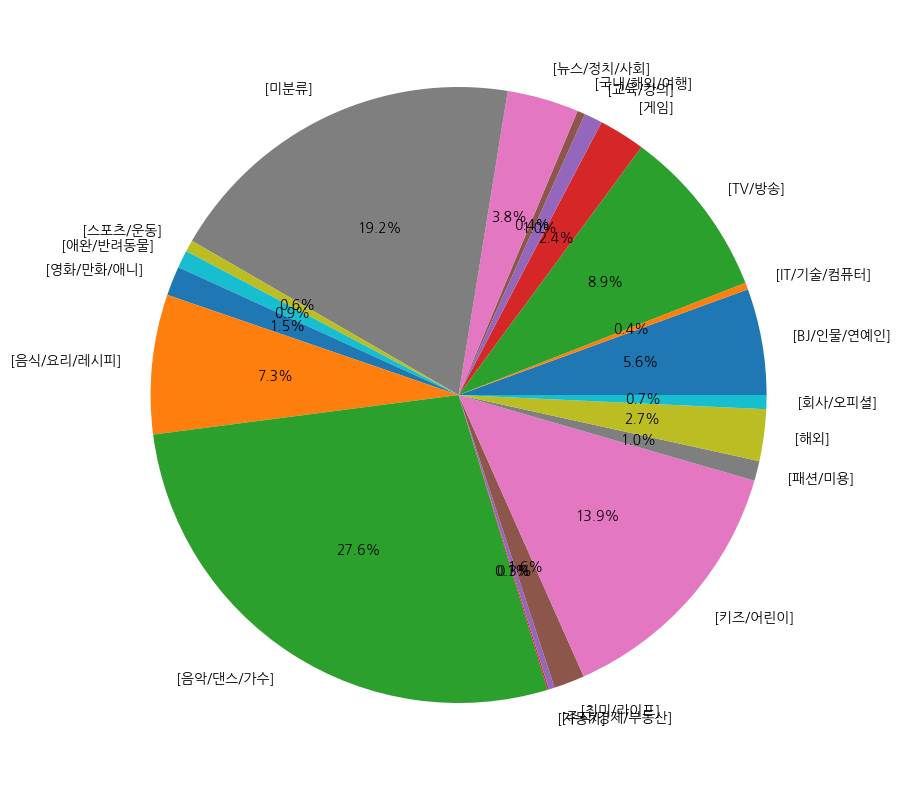

In [23]:
values=df_rank_pivot["전체 구독자 수"]
labels=df_rank_pivot["category"]
plt.figure(figsize=(30,10))
plt.pie(values, labels = labels, autopct="%.1f%%");

#### 2) 카테고리 별 채널 수

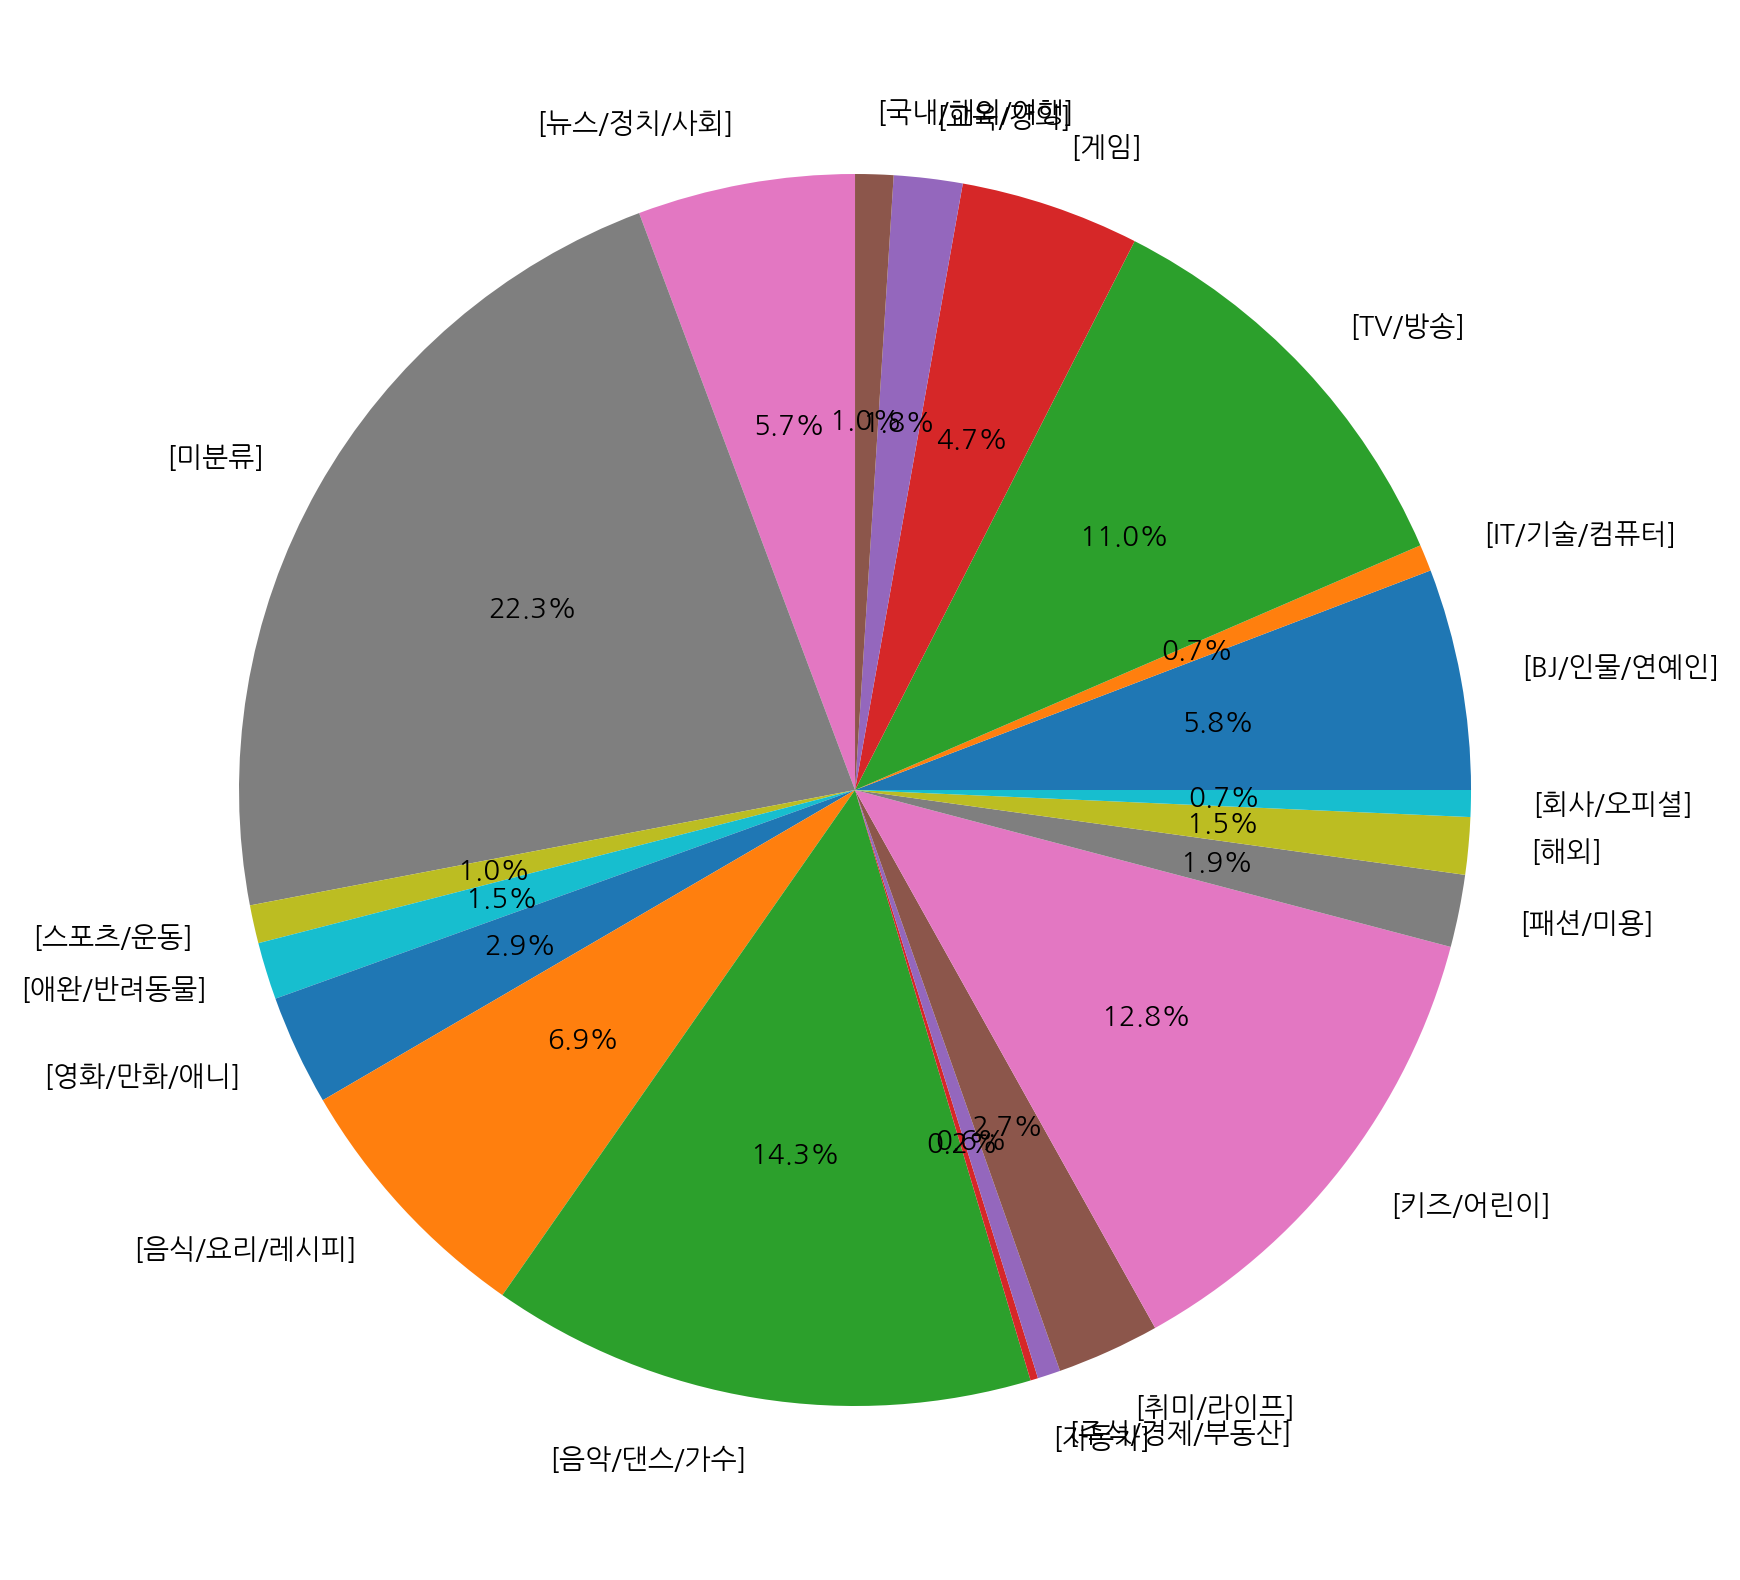

In [ ]:
values=df_rank_pivot["카테고리 수"]
labels=df_rank_pivot["category"]
plt.figure(figsize=(30,10))
plt.pie(values, labels = labels, autopct="%.1f%%");